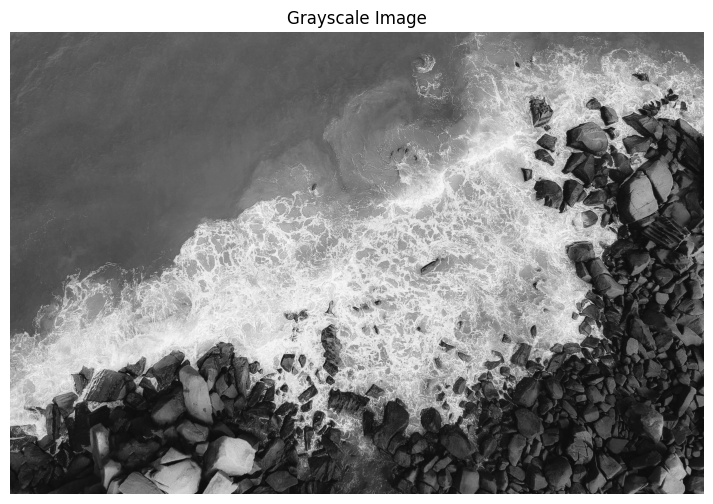

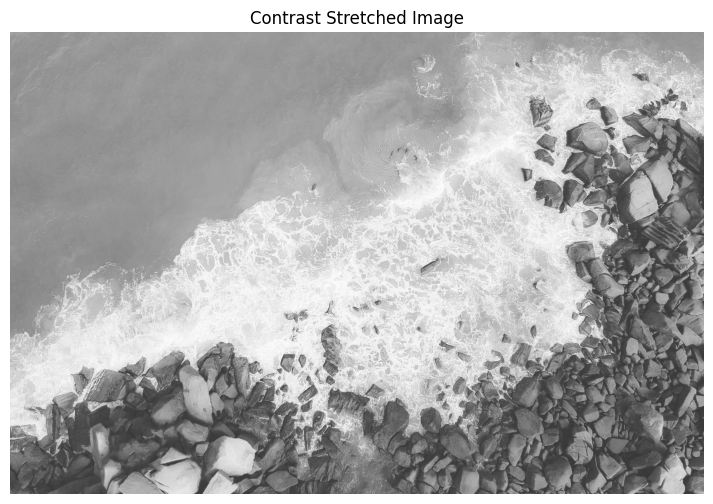

True

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


input_image = 'C:/test/new.jpg'
img = cv2.imread(input_image)

if len(img.shape) > 2:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 6))
plt.imshow(img, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off') 
plt.show()

minimum_value = np.min(img)
max_val = np.max(img)

contrast_stretched_image = (img - minimum_value) / (max_val - minimum_value) * 255.0
contrast_stretched_image = contrast_stretched_image.astype(np.uint8)


gamma = 0.5  
contrast_stretched_image = cv2.pow((img / 255.0), gamma) * 255.0
contrast_stretched_image = np.array(contrast_stretched_image, dtype=np.uint8)

plt.figure(figsize=(10, 6))
plt.imshow(contrast_stretched_image, cmap='gray')
plt.title('Contrast Stretched Image')
plt.axis('off')
plt.show()


output_image_path = 'C:/test/contrast_stretched_image1.jpg'
cv2.imwrite(output_image_path, contrast_stretched_image)


----------------------------------------------

Mean Shifted Image

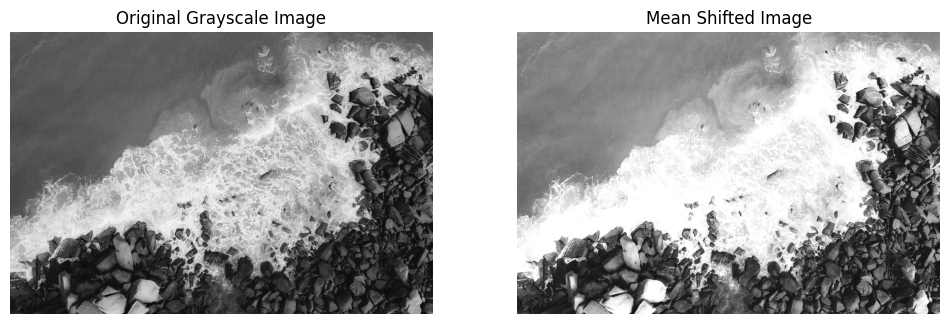

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('C:/test/new.jpg')

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

mean_value = np.mean(gray_image)
mean_shifted_image = gray_image.astype(
    np.float32) - mean_value + 200 # Shifting to center
mean_shifted_image = np.clip(mean_shifted_image, 0, 255).astype(np.uint8)


output_image_path = 'C:/test/mean_shifted_image.jpg'
cv2.imwrite(output_image_path, mean_shifted_image)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mean_shifted_image, cmap='gray')
plt.title('Mean Shifted Image')
plt.axis('off')

plt.show()


----------------------------------------------------

Blurred Image

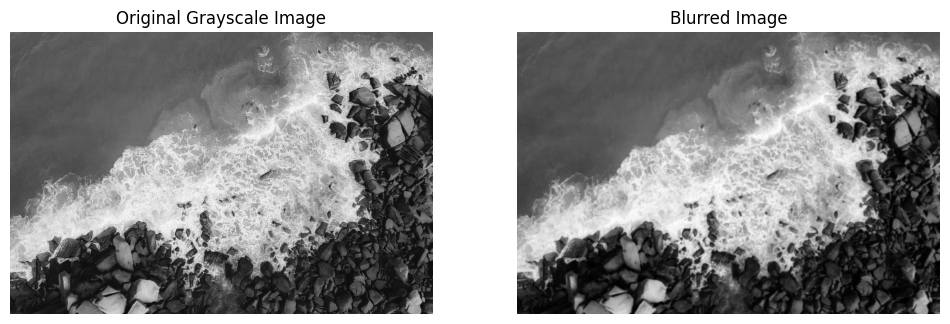

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


input_image = 'C:/test/new.jpg'
img = cv2.imread(input_image)

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#  Gaussian blur
blurred_image = cv2.GaussianBlur(gray_image, (25, 25), 0)

output_image_path = 'C:/test/grayscale_image.jpg'
cv2.imwrite(output_image_path, gray_image)

output_image_path = 'C:/test/blurred_image.jpg'
cv2.imwrite(output_image_path, blurred_image)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off') 

plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off') 

plt.show()

---------------------------------------------------

Gussain and Salt & Pepper Noise

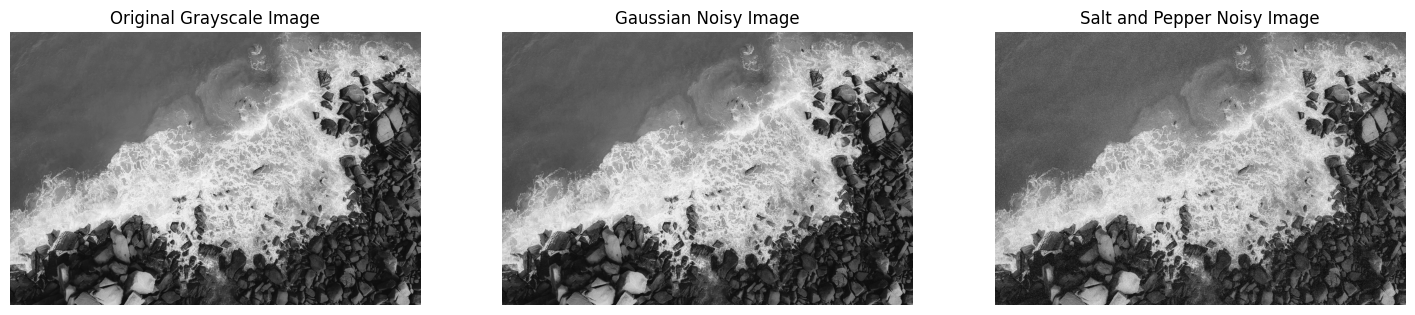

True

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


input_image = 'C:/test/new.jpg'
img = cv2.imread(input_image)


gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Gaussian noise intensity
mean = 0
var = 80
sigma = var ** 0.5
gaussian = np.random.normal(mean, sigma, gray_image.shape)
noisy_gaussian_image = gray_image + gaussian

noisy_gaussian_image = np.clip(noisy_gaussian_image, 0, 255)

#  Salt-and-Pepper noise intensity
s_vs_p = 0.5
amount = 0.07  # 7% of the image pixels
noisy_saltnpepper_image = np.copy(gray_image)

# Salt
salt = np.ceil(amount * gray_image.size * s_vs_p).astype(int)
coords_salt = (np.random.randint(0, gray_image.shape[0], salt),
               np.random.randint(0, gray_image.shape[1], salt))
noisy_saltnpepper_image[coords_salt] = 255
# Pepper 
pepper = np.ceil(amount * gray_image.size * (1 - s_vs_p)).astype(int)
coords_pepper = (np.random.randint(0, gray_image.shape[0], pepper),
                 np.random.randint(0, gray_image.shape[1], pepper))

noisy_saltnpepper_image[coords_pepper] = 0


plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_gaussian_image, cmap='gray')
plt.title('Gaussian Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(noisy_saltnpepper_image, cmap='gray')
plt.title('Salt and Pepper Noisy Image')
plt.axis('off')

plt.show()


output_path_gaussian = 'C:/test/noisy_gaussian_70.jpg'
output_path_sp = 'C:/test/noisy_salt_pepper_70.jpg'
cv2.imwrite(output_path_gaussian, noisy_gaussian_image)
cv2.imwrite(output_path_sp, noisy_saltnpepper_image)

-------------------------------------------------------

SSIM

In [32]:
from math import exp
import numpy as np
import torch
import torch.nn.functional as NeuralFunc
from torch.autograd import Variable
import cv2


def SSIM(image_ref, image_cmp, stability_constants, filter_size, dynamic_range):
    _, channels_ref, _, _ = image_ref.size()
    _, channels_cmp, _, _ = image_cmp.size()
    num_channels = min(channels_ref, channels_cmp)

    # Gaussian filter generation
    gaussian_sigma = 1.5
    gaussian_kernel = torch.Tensor(
        [exp(-(x - filter_size // 2) ** 2 / float(2 * gaussian_sigma ** 2)) for x in range(filter_size)])
    
    window_dimension_1 = (gaussian_kernel / gaussian_kernel.sum()).unsqueeze(1)
    window_dimension_2 = window_dimension_1.mm(window_dimension_1.t()).float().unsqueeze(0).unsqueeze(0)

    window_filter = Variable(window_dimension_2.expand(
        num_channels, 1, filter_size, filter_size).contiguous())

    # Stability constants squared
    C1 = stability_constants[0] ** 2
    C2 = stability_constants[1] ** 2

    mean_ref = NeuralFunc.conv2d(
        image_ref, window_filter, padding=filter_size // 2, groups=num_channels)
    mean_cmp = NeuralFunc.conv2d(
        image_cmp, window_filter, padding=filter_size // 2, groups=num_channels)

    mean_ref_sq = mean_ref.pow(2)
    mean_cmp_sq = mean_cmp.pow(2)
    mean_ref_cmp = mean_ref * mean_cmp

    variance_ref = NeuralFunc.conv2d(
        image_ref * image_ref, window_filter, padding=filter_size // 2, groups=num_channels) - mean_ref_sq
    variance_cmp = NeuralFunc.conv2d(
        image_cmp * image_cmp, window_filter, padding=filter_size // 2, groups=num_channels) - mean_cmp_sq
    covariance_rc = NeuralFunc.conv2d(
        image_ref * image_cmp, window_filter, padding=filter_size // 2, groups=num_channels) - mean_ref_cmp

    ssim_index_map = ((2 * mean_ref_cmp + C1) * (2 * covariance_rc + C2)) / \
        ((mean_ref_sq + mean_cmp_sq + C1) * (variance_ref + variance_cmp + C2))

    return ssim_index_map.mean()


image_paths = [
    'C:/test/grayscale_image.jpg',
    'C:/test/blurred_image.jpg',
    'C:/test/contrast_stretched_image1.jpg',
    'C:/test/mean_shifted_image.jpg',
    'C:/test/noisy_gaussian_70.jpg',
    'C:/test/noisy_salt_pepper_70.jpg',
    'C:/test/jpeg_compressed_image.jpg'
]


ssim_constants = [0.01, 0.03]
maximum_dynamic_range = 255
gaussian_filter_size = 11

original_image_path = 'C:/test/grayscale_image.jpg'
original_image = cv2.imread(original_image_path)
original_tensor = torch.from_numpy(np.rollaxis(
    original_image, 2)).float().unsqueeze(0) / maximum_dynamic_range


for path in image_paths:
    comparison_img = cv2.imread(path)
    comparison_tensor = torch.from_numpy(np.rollaxis(
        comparison_img, 2)).float().unsqueeze(0) / maximum_dynamic_range

    ssim_score = SSIM(original_tensor, comparison_tensor,
                              ssim_constants, gaussian_filter_size, maximum_dynamic_range)
    print(
        f"SSIM between original grayscale image and {path.split('/')[-1]}: {ssim_score.item()}")

SSIM between original grayscale image and grayscale_image.jpg: 1.0
SSIM between original grayscale image and blurred_image.jpg: 0.3957087993621826
SSIM between original grayscale image and contrast_stretched_image1.jpg: 0.8152047991752625
SSIM between original grayscale image and grayscale_image.jpg: 1.0
SSIM between original grayscale image and mean_shifted_image.jpg: 0.6496949791908264
SSIM between original grayscale image and noisy_gaussian_70.jpg: 0.7791324257850647
SSIM between original grayscale image and noisy_salt_pepper_70.jpg: 0.4012775123119354
SSIM between original grayscale image and jpeg_compressed_image.jpg: 0.9997809529304504


-------------------------------------------------

Properties

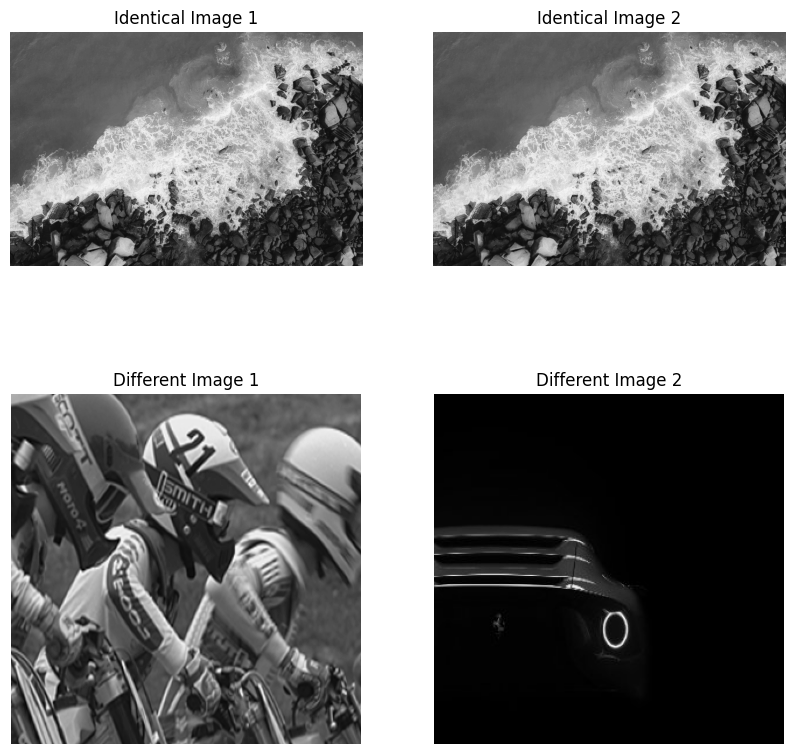

SSIM for identical images: 1.0
SSIM for different images: 0.001674520201049745 

SSIM symmetry test for identical : 1.0
SSIM reflexivity for identical : 1.0 

SSIM symmetry test for different : 0.001674520201049745
SSIM reflexivity test for different : 0.001674520201049745


In [34]:
import numpy as np
import cv2
import torch
from torch.nn.functional import conv2d
from math import exp


def create_gaussian_window(filter_size, sigma):
    kernel = torch.Tensor(
        [exp(-(x - filter_size // 2) ** 2 / (2 * sigma ** 2)) for x in range(filter_size)])
    kernel = kernel / kernel.sum()
    kernel_2d = kernel.unsqueeze(1) @ kernel.unsqueeze(0)
    return kernel_2d


def SSIM(image_1, image_2, filter_size=11, sigma=1.5, C1=0.01**2, C2=0.03**2):
    window = create_gaussian_window(
        filter_size, sigma).float().unsqueeze(0).unsqueeze(0)
    image_1 = image_1.float().unsqueeze(0)
    image_2 = image_2.float().unsqueeze(0)

    mean_1 = conv2d(image_1, window, padding=filter_size//2)
    mean_2 = conv2d(image_2, window, padding=filter_size//2)
    sigma_1_sq = conv2d(image_1 ** 2, window, padding=filter_size//2) - mean_1 ** 2
    sigma_2_sq = conv2d(image_2 ** 2, window, padding=filter_size//2) - mean_2 ** 2
    sigma12 = conv2d(image_1 * image_2, window, padding=filter_size//2) - mean_1 * mean_2

    ssim_map = ((2 * mean_1 * mean_2 + C1) * (2 * sigma12 + C2)) / \
        ((mean_1 ** 2 + mean_2 ** 2 + C1) * (sigma_1_sq + sigma_2_sq + C2))
    return ssim_map.mean()



identical_image_path1 = "C:/test/new.jpg"
identical_image_path2 = "C:/test/new.jpg"

different_image_path3 = "C:/test/t1.png"
different_image_path4 = "C:/test/t2.jpg"




id_img1 = cv2.imread(identical_image_path1, cv2.IMREAD_GRAYSCALE)
id_img2 = cv2.imread(identical_image_path2, cv2.IMREAD_GRAYSCALE)


diff_img1 = cv2.imread(different_image_path3, cv2.IMREAD_GRAYSCALE)
diff_img2 = cv2.imread(different_image_path4, cv2.IMREAD_GRAYSCALE)


id_img1_tensor = torch.from_numpy(np.array(id_img1)).unsqueeze(0)
id_img2_tensor = torch.from_numpy(np.array(id_img2)).unsqueeze(0)

diff_img1_tensor = torch.from_numpy(np.array(diff_img1)).unsqueeze(0)
diff_img2_tensor = torch.from_numpy(np.array(diff_img2)).unsqueeze(0)



id_ssim_symmetry_test = SSIM(id_img1_tensor, id_img2_tensor)
id_ssim_reflexivity_test = SSIM(id_img1_tensor, id_img2_tensor)

dff_ssim_symmetry_test = SSIM(diff_img1_tensor, diff_img2_tensor)
dff_ssim_reflexivity_test = SSIM(diff_img1_tensor, diff_img2_tensor)



ssim_identical = SSIM(id_img1_tensor, id_img2_tensor)
ssim_different = SSIM(diff_img1_tensor, diff_img2_tensor)


# Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(id_img1, cmap='gray')
axs[0, 0].set_title('Identical Image 1')
axs[0, 0].axis('off')

axs[0, 1].imshow(id_img2, cmap='gray')
axs[0, 1].set_title('Identical Image 2')
axs[0, 1].axis('off')

axs[1, 0].imshow(diff_img1, cmap='gray')
axs[1, 0].set_title('Different Image 1')
axs[1, 0].axis('off')

axs[1, 1].imshow(diff_img2, cmap='gray')
axs[1, 1].set_title('Different Image 2')
axs[1, 1].axis('off')

plt.show()




print(f"SSIM for identical images: {ssim_identical.item()}")
print(f"SSIM for different images: {ssim_different.item()} \n")


print(
    f"SSIM symmetry test for identical : {id_ssim_symmetry_test.item()}")
print(f"SSIM reflexivity for identical : {id_ssim_reflexivity_test.item()} \n")


print(
    f"SSIM symmetry test for different : {dff_ssim_symmetry_test.item()}")
print(
    f"SSIM reflexivity test for different : {dff_ssim_reflexivity_test.item()}")

---------------------------------------------------------------------------------------

Optimization

In [ ]:
import torch
import torch.optim as optim
import numpy as np
import cv2
import torch.nn.functional as NeuralFunctions
from math import exp


def compute_ssim(reference_image, comparison_image, stability_constants, filter_size, dynamic_range):
    _, reference_channels, _, _ = reference_image.size()
    _, comparison_channels, _, _ = comparison_image.size()
    number_of_channels = min(reference_channels, comparison_channels)

    gaussian_sigma = 1.5
    gaussian_kernel = torch.Tensor(
        [exp(-(x - filter_size // 2) ** 2 / float(2 * gaussian_sigma ** 2)) for x in range(filter_size)])

    one_dimensional_window = (
        gaussian_kernel / gaussian_kernel.sum()).unsqueeze(1)
    two_dimensional_window = one_dimensional_window.mm(
        one_dimensional_window.t()).float().unsqueeze(0).unsqueeze(0)
    window_filter = two_dimensional_window.expand(
        number_of_channels, 1, filter_size, filter_size).contiguous()


    constant1 = stability_constants[0] ** 2
    constant2 = stability_constants[1] ** 2

    reference_mean = NeuralFunctions.conv2d(
        reference_image, window_filter, padding=filter_size // 2, groups=number_of_channels)
    comparison_mean = NeuralFunctions.conv2d(
        comparison_image, window_filter, padding=filter_size // 2, groups=number_of_channels)

    reference_mean_squared = reference_mean.pow(2)
    comparison_mean_squared = comparison_mean.pow(2)
    reference_comparison_mean = reference_mean * comparison_mean

    reference_variance = NeuralFunctions.conv2d(
        reference_image * reference_image, window_filter, padding=filter_size // 2, groups=number_of_channels) - reference_mean_squared
    comparison_variance = NeuralFunctions.conv2d(
        comparison_image * comparison_image, window_filter, padding=filter_size // 2, groups=number_of_channels) - comparison_mean_squared
    covariance = NeuralFunctions.conv2d(
        reference_image * comparison_image, window_filter, padding=filter_size // 2, groups=number_of_channels) - reference_comparison_mean

    ssim_index_map = ((2 * reference_comparison_mean + constant1) * (2 * covariance + constant2)) / \
        ((reference_mean_squared + comparison_mean_squared + constant1)
         * (reference_variance + comparison_variance + constant2))

    return ssim_index_map.mean()


def compute_mean_squared_error(reference_image, comparison_image):
    return torch.mean((reference_image - comparison_image) ** 2)


def optimize_ssim(reference_image, comparison_image, target_mean_squared_error, ssim_constants, filter_size, dynamic_range, optimizer, number_of_steps=100, maximize=True):
    comparison_image = comparison_image.clone().detach().requires_grad_(True)

    for step in range(number_of_steps):
        optimizer.zero_grad()
        ssim_value = compute_ssim(
            reference_image, comparison_image, ssim_constants, filter_size, dynamic_range)
        mean_squared_error_value = compute_mean_squared_error(
            reference_image, comparison_image)
        mean_squared_error_penalty = (
            mean_squared_error_value - target_mean_squared_error) ** 2

        loss = (-ssim_value if maximize else ssim_value) + \
            1e3 * mean_squared_error_penalty
        loss.backward()
        optimizer.step()

    return comparison_image, compute_ssim(reference_image, comparison_image, ssim_constants, filter_size, dynamic_range)


image_path1 = 'C:/test/t1.png'
image_path2 = 'C:/test/t2.jpg'
image_ref = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
image_cmp = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)



scale_percent = 50  
width = int(image_ref.shape[1] * scale_percent / 100)
height = int(image_ref.shape[0] * scale_percent / 100)
dim = (width, height)

resized_image_ref = cv2.resize(image_ref, dim, interpolation=cv2.INTER_AREA)
resized_image_cmp = cv2.resize(image_cmp, dim, interpolation=cv2.INTER_AREA)


image_ref = torch.tensor(
    image_ref, dtype=torch.float32).unsqueeze(0).unsqueeze(0) / 255
image_cmp = torch.tensor(
    image_cmp, dtype=torch.float32).unsqueeze(0).unsqueeze(0) / 255

ssim_constants = [0.01, 0.03]
filter_size = 11
dynamic_range = 255


target_mse = compute_mean_squared_error(image_ref, image_cmp)

optimizer = optim.Adam([image_cmp], lr=0.05)


best_case_image, best_case_ssim = optimize_ssim(
    image_ref, image_cmp, target_mse, ssim_constants, filter_size, dynamic_range, optimizer, maximize=True)
worst_case_image, worst_case_ssim = optimize_ssim(
    image_ref, image_cmp, target_mse, ssim_constants, filter_size, dynamic_range, optimizer, maximize=False)

print("Best case SSIM:", best_case_ssim.item())
print("Worst case SSIM:", worst_case_ssim.item())
